# &#128205; Data Visualization 데이터 시각화 실습코드

## 목차

1. Basic Setups


2. 이진변수 시각화


3. 3개 이상의 변수 분석


4. 지도 시각화 (Folium)

# &#128205; 1. Basic Setups

## 환경 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

**주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [ ]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## 데이터프레임 확인

In [ ]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') # 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
#ipynb 파일과 csv 파일을 같은 폴더에 넣어주세요
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [ ]:
# 변수 타입 파악
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

#### 시각화에서 중요한 건 범주형변수, 연속형변수 두가지로 구분하고 시작하는 것 

> 범주형 변수 : 빈도(frequency) 계산 가능 <br/>
> 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능


- dtypes로 전체 변수 타입을 확인할때, 종종 범주형이어도 연속형 변수 dtype이라고 나오는 경우가 있어서 잘 확인해야 합니다 <br/>
- 이 예시에서는 trip_duration과 day_since_register만 연속형 변수고 그 외는 다 범주형이네요. <br/>
- astype을 활용해 실제로 연속형이 아닌데, int64(연속형)인 변수들을 string으로 만들어줍니다!

In [ ]:
df['start_station_id']=df['start_station_id'].astype(str) #컬럼 단위로 type을 변경해줍니다!
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)

In [ ]:
# trip_duration은 minute 단위로 바꿔주었어요
df['trip_duration_min']=df['trip_duration'] /60

In [ ]:
df.dtypes #다시 한 번 type을 체크합니다.

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
trip_duration_min          float64
dtype: object

## &#128205; 2. 이진 변수 시각화

두 변수간의 관계를 살피기 위해 시각화해보자!

### 2.1 연속형 변수 - 연속형 변수 관계

#### 2.1.1 Scatterplot
Pandas Visualization 활용

<Figure size 720x360 with 0 Axes>

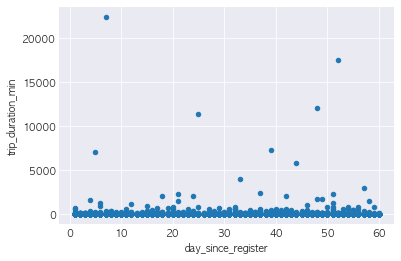

In [ ]:
# pandas dataframe에 내장된 함수 plot()을 이용해볼게요.
plt.figure(figsize=(10,5)) #그래프가 나타날 창 크기 설정
df.plot.scatter(x='day_since_register',y='trip_duration_min')
plt.show()

In [ ]:
#이상치가 너무 커서 아래 데이터의 분포가 잘 안 보이네요.
#y의 상위 1% 이상치를 제거해줄게요
#이상치도 제거할게요 (y값의 최상위 1% 제거)
cut_point = df["trip_duration_min"].quantile(0.99) # 상위 99% 값을 cut_point로 지정 
df_cut=df[df['trip_duration_min'] < cut_point]
#trip_duration에 최상위 1% 컷보다 적은 값들만 남긴 df를 새로운 변수인 df_cut로 명명합니다.

<Figure size 7200x7200 with 0 Axes>

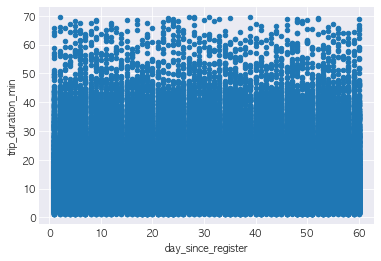

In [ ]:
#이상치를 제거한 데이터로 그래프를 다시 그립니다
plt.figure(figsize=(100,100)) #그래프가 나타날 창 크기 설정
df_cut.plot.scatter(x='day_since_register',y='trip_duration_min')
plt.show()

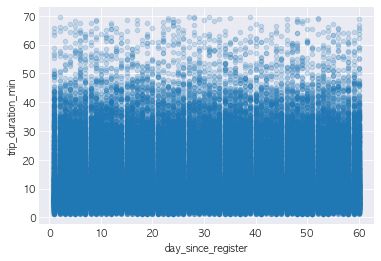

In [ ]:
#점이 겹쳐서 잘 안보이니 투명도를 조절해줄게요(alpha 조정)
df_cut.plot.scatter(x='day_since_register',y='trip_duration_min', alpha=0.2)
plt.show()

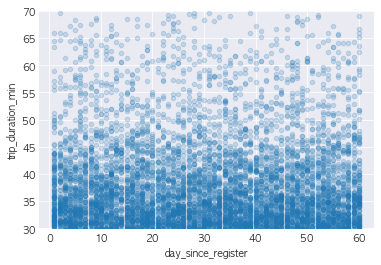

In [ ]:
#윗부분만 확대해서 보고 싶다면?
df_cut.plot.scatter(x='day_since_register',y='trip_duration_min', alpha=0.2)
plt.ylim(30, 70) # 0-30 사이의 축을 밀어버림
plt.show()

#### 2.1.2 Scatterplot with Regression fit
Seaborn 활용
- regplot : scatter plot과 line plot을 함께 보고 싶을 때 사용

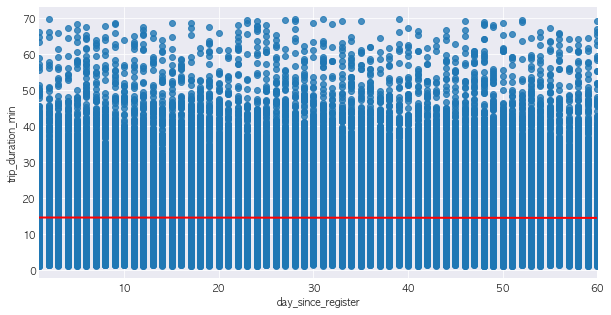

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=df_cut['day_since_register'],y=df_cut['trip_duration_min'],
                line_kws={"color":"red","lw":2}) # line 색깔, 두께
plt.show()

### 2.2 범주형 변수 - 범주형 변수 관계

seaborn countplot 활용 누적 막대 그래프<br/>
**변수 1 IN x축 or y축 하나 / 변수 2 IN hue(색상)**

[Countplot 링크](https://seaborn.pydata.org/generated/seaborn.countplot.html)

**A. Vertical Countplot (x를 명시)**

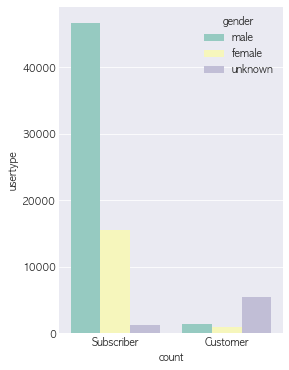

In [ ]:
# 성별 gender 별 usertype 분포
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='usertype',hue='gender',data=df_cut, palette='Set3') 
#usertype에 따라 그래프가 그려지고 성별에 따라 색상이 달라짐
cnt.set_xlabel("count")
cnt.set_ylabel("usertype")
plt.show()

**해석 보태기**
> 구독자가 아닌 일시적인 Customer에는 성별조차 등록하지 않은 멤버가 많다.

**B. Horizontal Countplot (y를 명시)**

In [ ]:
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top으로 생성
top_list=df_cut['start_station_name'].value_counts().nlargest(10).index
df_top=df_cut[df_cut['start_station_name'].isin(top_list)]

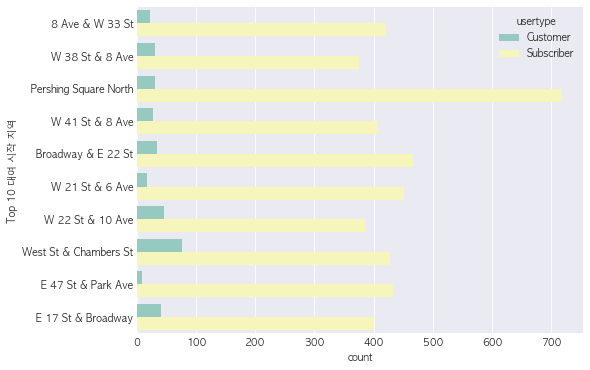

In [ ]:
# 상위 대여시작지점 별 usertype 분포
plt.figure(figsize=(8,6))
cnt=sns.countplot(y='start_station_name',hue='usertype',data=df_top,palette='Set3')
cnt.set_xlabel("count")
cnt.set_ylabel("Top 10 대여 시작 지역")
plt.show()

**해석 보태기**
> Pershing Square North를 시작지점으로 하는 구독자가 많다

### 2.3 범주형 변수 - 연속형 변수 관계

#### 2.3.1 범주형 변수(카테고리)가 10개 이하

**A. seaborn의 boxplot**

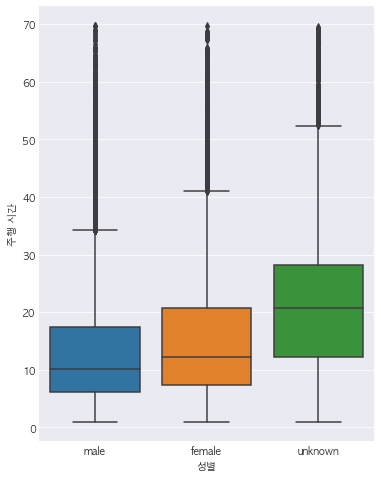

In [ ]:
# 성별 gender 와 주행 시간 trip_duration
plt.figure(figsize=(6,8))
box=sns.boxplot(x='gender',y='trip_duration_min',data=df_cut)
# sns.catplot(kind='box')를 사용해도 동일하다
box.set_xlabel("성별")
box.set_ylabel("주행 시간")
plt.show()
# 1사분위-1.5IQR,1,2,3사분위, 3사분위+1.5IQR
# IQR은 1-3사분위 사이 간격

**B. seaborn의 [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html), 그 안의 box 또는 boxen** <br/>
kind='boxen'을 kind='box'로 변경하실 수 있습니다
<br/> boxen 그래프는 boxplot에서 **더 많은 정보를 담는 신상 그래프**입니다

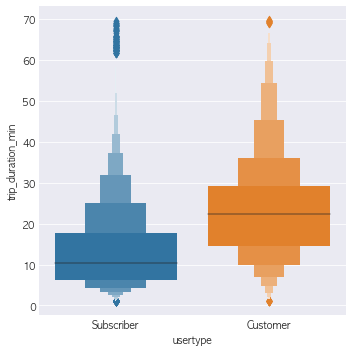

In [ ]:
# Usertype 과 주행 시간 trip_duration
sns.catplot(x='usertype',y='trip_duration_min', kind='boxen',data=df_cut)
plt.show()

**해석 보태기**
> subscriber의 주행시간은 customer보다 더 짧은 분포를 보인다.

#### 4.3.2 범주형 변수가 10개 이상
범주형 변수의 고유값이 많을 때, 상위 또는 하위 n개로 자르고 Horizontal로 시각화

In [ ]:
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top으로 생성
top_list=df_cut['start_station_name'].value_counts().nlargest(10).index
df_top=df_cut[df_cut['start_station_name'].isin(top_list)]

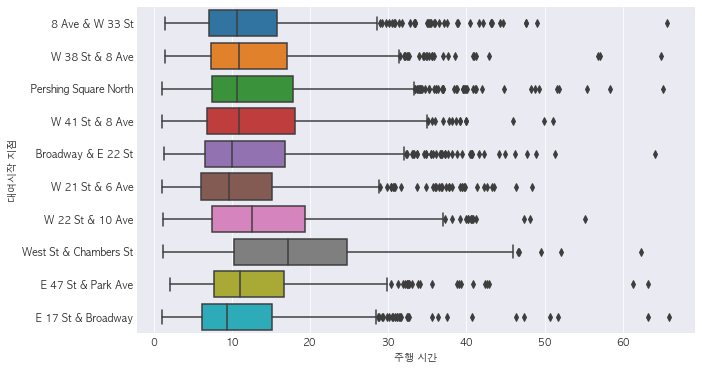

In [ ]:
plt.figure(figsize=(10,6))
box=sns.boxplot(y='start_station_name',x='trip_duration_min',data=df_top)
box.set_xlabel("주행 시간")
box.set_ylabel("대여시작 지점")
plt.show()

**해석 보태기**
> West St & Chambers St 에서 유난히 주행시간 중앙값이 높고, 전체 값들이 넓게 퍼져 있다. <br/> 더불어 건수도 상위 2위로 많으니, 여기에 바이크를 더 배치하자! <br/>[박스플랏 해석방법](https://codedragon.tistory.com/7012)

## &#128205; 3. 3개 이상의 변수 분석

### 3.1 버블도(Bubble Scatter Chart, Bubble Plot)

일반 scatterplot처럼 x와 y의 관계를 나타내지만,<br/>
**버블의 크기 또는 색상**이 또 하나의 정보로 표시됨.<br/>
크기, 색상 둘다 추가해서 **x,y,버블 크기,버블 색상까지 4개의 변수**를 그래프에 표현할 수 있다!

하지만 담은 정보의 양이 너무 과하면 좋지 않은 시각화임을 유의할 것! <br/>
[Bubble Chart various types with Python](https://python-graph-gallery.com/bubble-plot/) <br/>
[3개 이상 변수를 시각화하는 4가지 방법](https://m.blog.naver.com/PostView.nhn?blogId=jiehyunkim&logNo=220822154180&proxyReferer=https%3A%2F%2Fwww.google.com%2F)

**상위 top 10개 시작 지역 / 시작 시간대별 / 주행 시간** 변수로 버블도를 그려보겠습니다

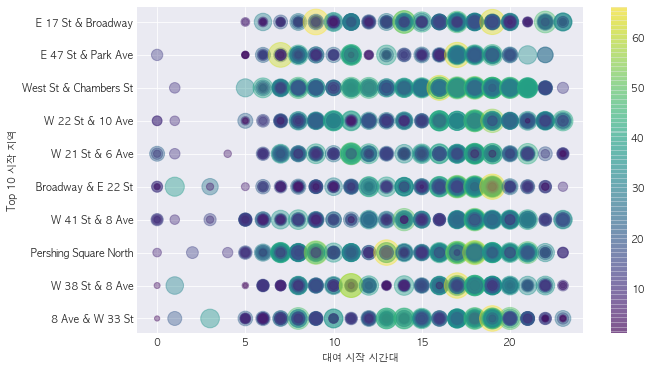

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_top['start_hour'], # x축
            df_top['start_station_name'], # y축
            c=df_top['trip_duration_min'], # 색상
            s=10*df_top['trip_duration_min'], # 사이즈 
            # 10을 곱한 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.4, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('Top 10 시작 지역')
plt.xlabel('대여 시작 시간대')
# plt.xticks(rotation=90) # x축에 종류가 많거나 글자가 길면 label 돌려주기
plt.show()

**해석 보태기**
> 한 번에 포함하는 변수가 많아질수록 그래프를 해석하기 어려워짐. 
> <br/>이 그래프를 통해서는 보통 수요가 없는 새벽 시간대에도 'Broadway & E 22 St', 'W 38 St & 8 Ave' 쪽에서 주행 시간이 꽤 긴 대여 수요가 발생하고 있다고 해석해볼 수 있다.

### 3.2 히트맵(Heatmap)

heatmap은 **실전에서 잘 쓰이고, 직관적!**
<br/> 위 그래프를 히트맵으로 그려보았습니다

**상위 top 10개 시작 지역 / 시작 시간대별 / 주행 시간** 으로 히트맵을 그려볼게요

In [ ]:
# 핵심은 groupby
base=df_top.groupby(['start_station_name','start_hour'])['bike_id'].count().unstack() # unstack은 밑으로 늘어지는 걸 옆으로 돌림!
# 시작지역과 시작 시간대를 기준으로 bike id를 count해서 묶어줍니다
# unstack은 아래로 길게 뻗어있는(long) 데이터프레임을 옆으로 늘려(wide) 줍니다. (설명: https://rfriend.tistory.com/276)
base

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
8 Ave & W 33 St,1.0,1.0,NaN,1.0,NaN,12.0,23.0,21.0,45.0,34.0,...,9.0,19.0,23.0,53.0,53.0,48.0,17.0,21.0,15.0,5.0
Broadway & E 22 St,5.0,1.0,NaN,2.0,NaN,1.0,5.0,9.0,32.0,16.0,...,26.0,20.0,30.0,74.0,133.0,67.0,15.0,8.0,6.0,1.0
E 17 St & Broadway,NaN,NaN,NaN,NaN,NaN,2.0,7.0,11.0,17.0,26.0,...,30.0,21.0,36.0,56.0,54.0,41.0,28.0,7.0,16.0,9.0
E 47 St & Park Ave,1.0,NaN,NaN,NaN,NaN,5.0,11.0,36.0,34.0,14.0,...,6.0,12.0,34.0,116.0,97.0,30.0,8.0,1.0,2.0,NaN
Pershing Square North,1.0,NaN,1.0,NaN,1.0,6.0,9.0,57.0,99.0,72.0,...,17.0,27.0,39.0,100.0,128.0,62.0,20.0,18.0,9.0,3.0
W 21 St & 6 Ave,3.0,1.0,NaN,NaN,1.0,NaN,9.0,22.0,30.0,29.0,...,17.0,23.0,30.0,46.0,71.0,34.0,20.0,22.0,2.0,8.0
W 22 St & 10 Ave,2.0,1.0,NaN,NaN,NaN,4.0,3.0,20.0,35.0,32.0,...,19.0,13.0,34.0,30.0,65.0,28.0,29.0,23.0,26.0,8.0
W 38 St & 8 Ave,1.0,1.0,NaN,NaN,NaN,2.0,20.0,8.0,37.0,42.0,...,18.0,17.0,17.0,53.0,61.0,43.0,11.0,10.0,9.0,4.0
W 41 St & 8 Ave,5.0,1.0,NaN,2.0,NaN,38.0,29.0,10.0,21.0,31.0,...,16.0,14.0,11.0,51.0,76.0,42.0,25.0,16.0,7.0,7.0


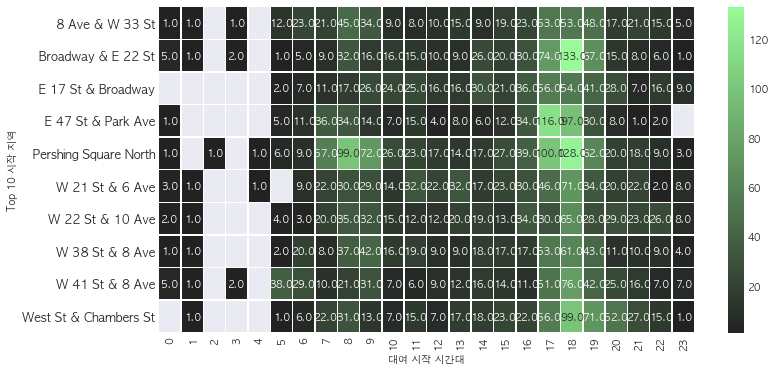

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
pal = sns.dark_palette("palegreen", as_cmap=True) # color palette 설정, as_cmap은 true일 경우 matplotlib colormap object를 반환
sns.heatmap(base, 
            annot=True, # 셀에 숫자 표기
            ax=ax, # 위에서 만들어 둔 캔버스의 (Matplotlib) Axes
            linewidths=.5, # 셀을 나눌 선의 너비
            fmt='.1f', # 소수점 자리 처리
           cmap=pal) # 컬러팔레트 설정
plt.ylabel('Top 10 시작 지역')
plt.xlabel('대여 시작 시간대') 
plt.xticks(rotation=90) 
plt.yticks(fontsize=12)# x축에 종류가 많으니까 label 돌려주기
plt.show()

# heatmap 파라미터 설명은 링크 참고! https://seaborn.pydata.org/generated/seaborn.heatmap.html 

**해석 보태기**
> 주로 17~19시 사이에 대여를 시작하는 경우가 많음.

> 연한 녹색으로 표시된 대여 많은 시간대가 나타난 시작지역의 경우 해당 시간대에 비치된 bike의 숫자를 늘리는 방안을 생각할 수 있음

## &#128205; 4. 지도 시각화(Folium)

In [ ]:
!{sys.executable} -m pip install folium
import folium
#folium을 설치해줍니다

### STEP 1. 빈 캔버스 역할을 하는 지도를 그린다

In [ ]:
# 함수를 만들어서 지도를 만들어보자
def generateBaseMap(default_location=[40.746176, -73.996453], #google map에 들어가서 원하는 위치를 찍으면 location 좌표를 찾을 수 있어요
                    default_zoom_start=11): #location과 시작 확대 정도를 파라미터로 받는 함수를 만들었어요
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

# folium.Map의 파라미터 설명은 링크 참조! https://python-visualization.github.io/folium/modules.html 

In [ ]:
base_map=generateBaseMap()
base_map

### STEP 2. 데이터프레임의 위도, 경도를 넣어줘 빈 캔버스에 히트맵을 칠한다


In [ ]:
# df_cut 데이터로 위도, 경도를 groupby한 후 위에서 만든 캔버스에 히트맵 적용(add_to)
from folium.plugins import HeatMap
HeatMap(data=df_cut[['start_station_latitude', 'start_station_longitude']].drop_duplicates().reset_index(drop=True)
, radius=8, max_zoom=11).add_to(base_map)
# 시작 위치의 위도, 경도에 따라 heatmap이 그려짐!초록색일수록 그 지점에서 많이 출발했다 

In [ ]:
base_map

### 3. 각 Unique한 Station에 대한 좌표를 찍는다

In [ ]:
# 가장 대여 기록이 많은 시작 Station 10개의 리스트
top_list=df_cut['start_station_name'].value_counts().nlargest(10).index.to_list()
top_list

['Pershing Square North',
 'West St & Chambers St',
 'Broadway & E 22 St',
 'W 21 St & 6 Ave',
 '8 Ave & W 33 St',
 'E 17 St & Broadway',
 'E 47 St & Park Ave',
 'W 41 St & 8 Ave',
 'W 22 St & 10 Ave',
 'W 38 St & 8 Ave']

In [ ]:
# Station별 위도 경도 Unique값만 추리기
station_unique=df_cut[['start_station_name','start_station_latitude', 'start_station_longitude']].drop_duplicates()
station_unique.head()

,start_station_name,start_station_latitude,start_station_longitude
0,South End Ave & Liberty St,40.711512,-74.015756
1,Vernon Blvd & 47 Rd,40.744907,-73.953457
2,W 43 St & 10 Ave,40.760094,-73.994618
3,Broadway & W 25 St,40.742869,-73.989186
4,Fulton St & Adams St,40.692418,-73.989495


In [ ]:
station_unique_10=station_unique[station_unique['start_station_name'].isin(top_list)]

In [ ]:
station_unique_10

,start_station_name,start_station_latitude,start_station_longitude
6,8 Ave & W 33 St,40.751551,-73.993934
33,W 38 St & 8 Ave,40.754666,-73.991382
50,Pershing Square North,40.751873,-73.977706
114,W 41 St & 8 Ave,40.756405,-73.990026
116,Broadway & E 22 St,40.740343,-73.989551
139,W 21 St & 6 Ave,40.741740,-73.994156
257,W 22 St & 10 Ave,40.746920,-74.004519
303,West St & Chambers St,40.717548,-74.013221
363,E 47 St & Park Ave,40.755103,-73.974987
390,E 17 St & Broadway,40.737050,-73.990093


In [ ]:
data=station_unique_10
data=data.rename(columns={'start_station_longitude':'lon',
                     'start_station_latitude':'lat',
                     'start_station_name':'name'})

#지도에 좌표(marker) 찍기
for i in range(0,len(data)): 
    folium.Marker([data.iloc[i]['lat'], data.iloc[i]['lon']],
                  popup=data.iloc[i]['name']).add_to(base_map)  #popup은 좌표 위에 label을 붙여주는 파라미터

#더 많은 파라미터 정보는 링크 참조! https://python-visualization.github.io/folium/modules.html 

In [ ]:
base_map

### 4. 개인 로컬에 html로 저장

In [ ]:
#로컬에서 map_nyc_citibike.html을 검색하고 열어보세요!
base_map.save('map_nyc_citibike.html')